# Projeto 2 - Ciência dos Dados

## Grupo: *Dom Ruan Suzano, Grasielly Almeida, Hudson Monteiro, Quézia Moura*

## _Introdução_

### Contexto: Diagnósticos de AIDS e HIV

> *A base de dados escolhida procura prever as mortes relacionadas ao diganósticos de AIDS e HIV, sobretudo, associados a distinção quanto ao gênero masculino e feminino dos possuidores das doenças.*


* Diagnostico de HIV: o indivíduo é portador do vírus, porém é assintomático.


* Diagnostico de AIDS: paciente está no estado avançado da doença e começa a apresentar sintomas.


#### vale ressaltar que nem todos os pacientes com HIV tem AIDS

## Dataset e bibliotecas necessárias

---

### _Dataset_

____


* __Target:__ 

> > Variável dependente, cujo comportamento será previsto perante a influência das demais variáveis que compõem a base de dados

> __Gender__ - *Male and Female*

* __Features:__ 

> > Variáveis explicativas que influenciam no comportamento da variável principal

> * __Utilizadas para o projeto:__

> 1) __Year (Ano)__

> 2) __Borough (Bairro)__

> 3) __UHF (Distrito)__

> 4) __Gender (Gênero)__

> 5) __Age (Idade)__	

> 6) __Race (Raça)__

> 7) __HIV diagnoses (Diagnosticos de HIV)__

> 8) __HIV diagnosis rate (Taxas de diagnósticos de HIV)__

> 9) __Concurrent diagnoses(Diagnóstico simultâneo)__	

> 10) __% linked to care within 3 months (Pessoas diagnosticadas com HIV que fizeram a 1a visita médica nos últimos 3 meses)__

> 11) __AIDS diagnoses (Diagnósticos de AIDS)__	

> 12) __AIDS diagnosis rate (Taxas de diagnósticos de AIDS)__	

> 13 __PLWDHI prevalence (Pessoas que vivem com diagnóstico de HIV )__	

> 14) __% viral suppression (Taxa de supressão do vírus)__	

> 15) __Deaths (Mortes)__	

> 16) __Death rate (Taxa de mortes)__	

> 17) __HIV-related death rate (Taxa das pessoas que morreram com HIV)__	

> 18) __Non-HIV-related death rate(Taxa das pessoas que morreram sem HIV)__


### Bibliotecas utilizadas

In [1]:
# Bibliotecas 

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy 
import os
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
%matplotlib inline


from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC 
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import r2_score, mean_squared_error



### Diretório:

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\quezi\OneDrive\Área de Trabalho\projeto_2_ciencia_dos_dados


### Visualizando a bases de dados após seu carregando

In [3]:
df = pd.read_csv('DOHMH_HIV_AIDS_Annual_Report.csv')

In [4]:
df.head(10)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379,48.3,640,66,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595,79.1,480,66,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733,21.1,153,66,622,17.6,0.6,68,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51,99999.0,7,63,32,99999.0,99999.0,55,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64,22,6.4,0.1,57,1,1.4,1.4,0.0
5,2011,All,All,Female,20 - 29,All,178,24.7,20,67,96,13.3,0.3,48,19,7.2,3.2,4.0
6,2011,All,All,Female,30 - 39,All,176,26.9,31,66,133,20.3,0.6,61,53,9.4,5.7,3.7
7,2011,All,All,Female,40 - 49,All,195,33.0,50,62,210,35.5,1.4,66,184,15.9,7.8,8.1
8,2011,All,All,Female,50 - 59,All,130,23.5,32,72,133,24.0,1.3,73,231,24.1,11.5,12.6
9,2011,All,All,Female,60+,All,57,6.7,23,68,60,7.1,0.3,81,129,33.5,10.6,22.9


### Iniciando as análises do DataFrame

> Antes da análise da base de dados necessário a limpeza a seleção dos dados relevante, excluindo os elementos que não serão necessários para os modelos apresentados posteriormente.

> Primeiramente é realizada a filtragem de dados associados a categorias "Gender”, selecionando apenas os dados relacionados ao gênero masculino e feminino. Para isso, visualiza-se todas as variáveis presentes na categoria de gênero (Gender). Além das variáveis desejadas ‘Female’ e ‘Male’, existem duas outras nomeadas de ‘all’ e 'Transgender', perante a análise proposta com a análise de distinção entre as mortes associadas a homens e mulheres, será necessário a exclusão de ‘all’ e de ‘'Transgender' devido a impossibilidade de diferenciação entre os gêneros presentes, isto é, masculinos e femininos.


### Limpando a base de dados e visualização das 10 primieras linhas após a limpeza

#### Retirando gêneros de categorias "All" e "Transgender"  

In [5]:
limpa_all = df['Gender'] != 'All'
limpa_trans = df['Gender'] != 'Transgender'
limpa_bairros = df['UHF'] != 'All'
limpa_regioes = df['Borough'] != 'All'
junta = df['Age'] == 'All'
junta_novo = df['Race'] == 'All'
new_df = df.loc[limpa_all,:]
base = new_df.loc[limpa_trans,:]
base = base.loc[junta & junta_novo & limpa_trans & limpa_all & limpa_bairros & limpa_regioes, :]


> Após a filtragem de dados anterior, limpamos as linhas em que o número de mortes ultrapassava o numero de diagnósticos de HIV ou AIDS, por não ter mais informações sobre a ligação do número de mortes com os diagnósticos.

In [7]:
# Limpando as mortes que não estão associados aos diganósticos de HIV e AIDS

base = base.loc[base['Deaths'] <= (base['HIV diagnoses']+base['AIDS diagnoses']-base['Concurrent diagnoses']), :].copy()

> Para a análise posterior de nossa target "Gender", por se tratar de uma variável qualitativa, foi acrescida a base de dados a catergoria mortes por diagnósticas ('Deaths per diagnoses'), essa permitirá a amostra gráfica perante a variável dependente de gênero e sua relação com o número de mortes.

In [8]:
base['Deaths per diagnoses'] = base['Deaths']/(base['HIV diagnoses']+base['AIDS diagnoses']-base['Concurrent diagnoses'])

In [9]:
mulher = base.loc[(base['Gender']=='Female'), :]
homem = base.loc[(base['Gender']=='Male'), :]

### Plotando os gráficos das mortes associadas a homens e a mulheres por diagnósticos

> Após a etapa anterior, como primeiros passos das nossas análises, foi feita a inspeção das mortes por diagnósticos, para assim observar se há uma distinção entre o número de mortes. A observação dos gráficos a seguir foi tomada como hipótese da análise do nosso modelo, tomando a categoria "Gender" (Gênero) como variável que traz o perfil do indivíduo e que por hipótese traz uma variedade quanto as número de mortes.

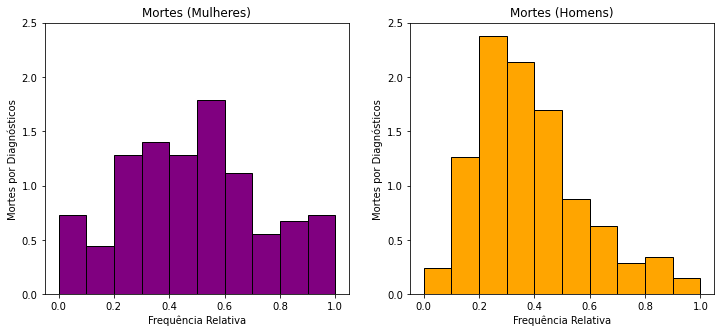

In [10]:
# Gráficos de mortes de homens e mulheres
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(mulher['Deaths per diagnoses'], color = 'purple', density=True,edgecolor = 'k')
plt.xlabel('Frequência Relativa')
plt.ylabel('Mortes por Diagnósticos')
plt.title('Mortes (Mulheres)')
plt.ylim(0,2.5)

plt.subplot(1,2,2)
plt.hist(homem['Deaths per diagnoses'], color = 'orange', density=True,edgecolor = 'k')
plt.xlabel('Frequência Relativa')
plt.ylabel('Mortes por Diagnósticos')
plt.title('Mortes (Homens)')
plt.ylim(0,2.5)
plt.show()

> Pelo histograma vê-se que a porcentagem dos homens que receberam os diagnósticos e, consequentemente, morreram se concentra em torno de 25%, já no histograma das mulheres a distribuição é mais uniforme tendo uma pequena concentração em torno dos 60%, evidenciando que a difenrença de gênero tem importância nas mortes por AIDS e HIV.

In [25]:
nova_base = base.loc[:, ['Deaths','Year', 'Borough', 'UHF', 'Age', 'Gender' ,'Race', 'HIV diagnoses','HIV diagnosis rate', 'Concurrent diagnoses','% linked to care within 3 months']]

## Visualizando correlação entre as variáveis do grupo "Female" e "Male" (Feminino e masculino, respectivamente), 

> Com base nos histograma que levava em consideração o número de mortes por diagnósticos entre tanto para homens e quanto para mulheres, foram feitas as correlações entre as variáveis com base na categoria "Gender" e foi escolhido as que tinham as maiores correlações com a variável target "Deaths".

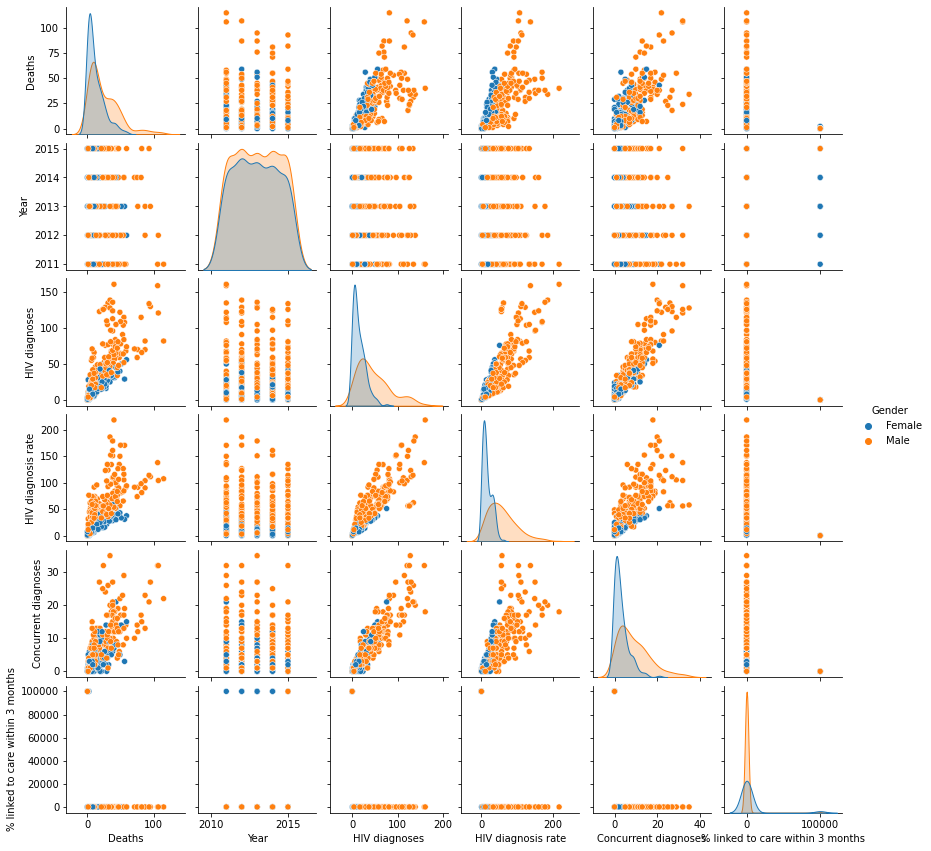

In [12]:
sns.pairplot(nova_base,height=2,hue = 'Gender');

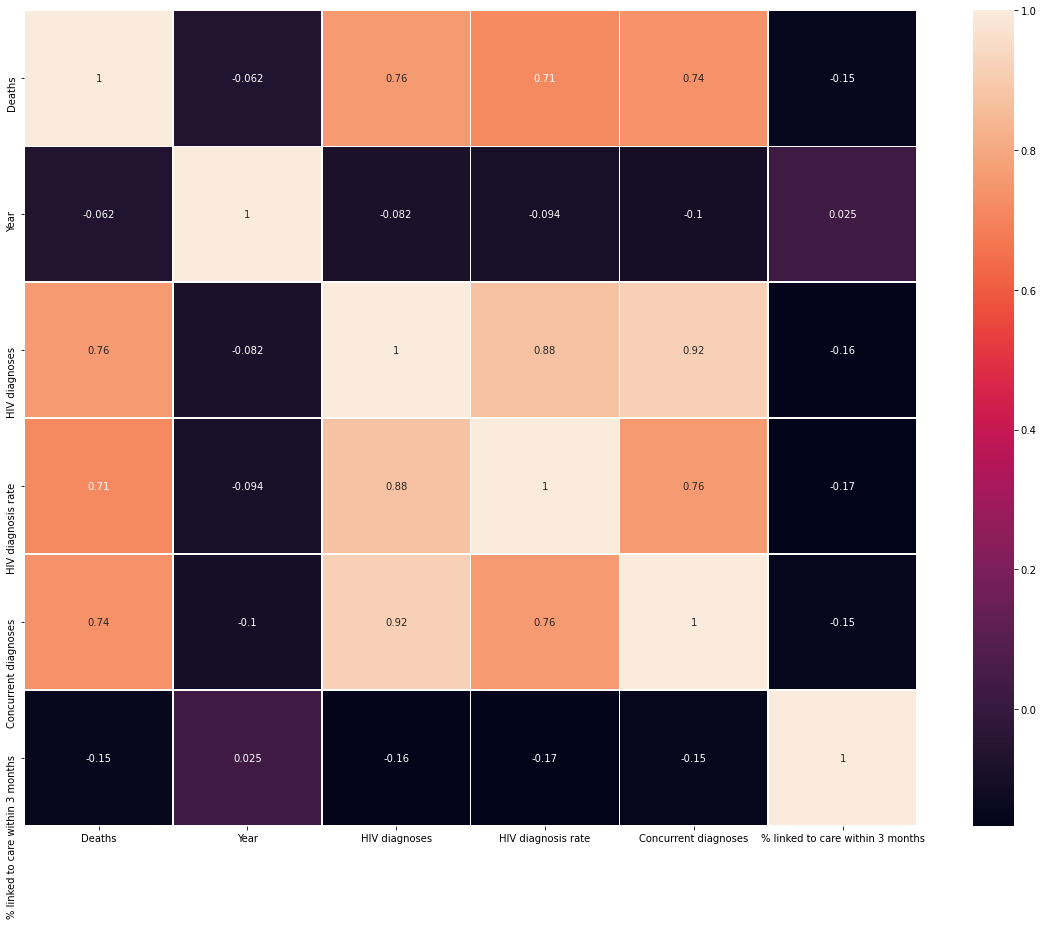

In [13]:
# Mapa de calor - Para melhor visualização de correlção entre as variáveis

fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(nova_base.corr(),ax=ax,annot=True,linewidth=.5);

### Conclusão da Análise 1.

> Observando os primeiros gráficos e os mapas de calor e a target "Deaths", cuja variável queremos entender perante a diferança de gêneros é notória o alto grau de realação entre as features "HIV diagnoses", "HIV diagnoses" e "Concurrent diagnoses", visto que possuem altas correlações, notada por meio dos gráficos anteriores e confirmada pelo mapa de calor tornando essas as mais relevantes para o funcionamento dos modelos.


In [26]:
nova_base = base.loc[:, ['Deaths','Gender', 'AIDS diagnoses',
       'AIDS diagnosis rate', 'PLWDHI prevalence', '% viral suppression',
        'Death rate', 'HIV-related death rate',
       'Non-HIV-related death rate']]

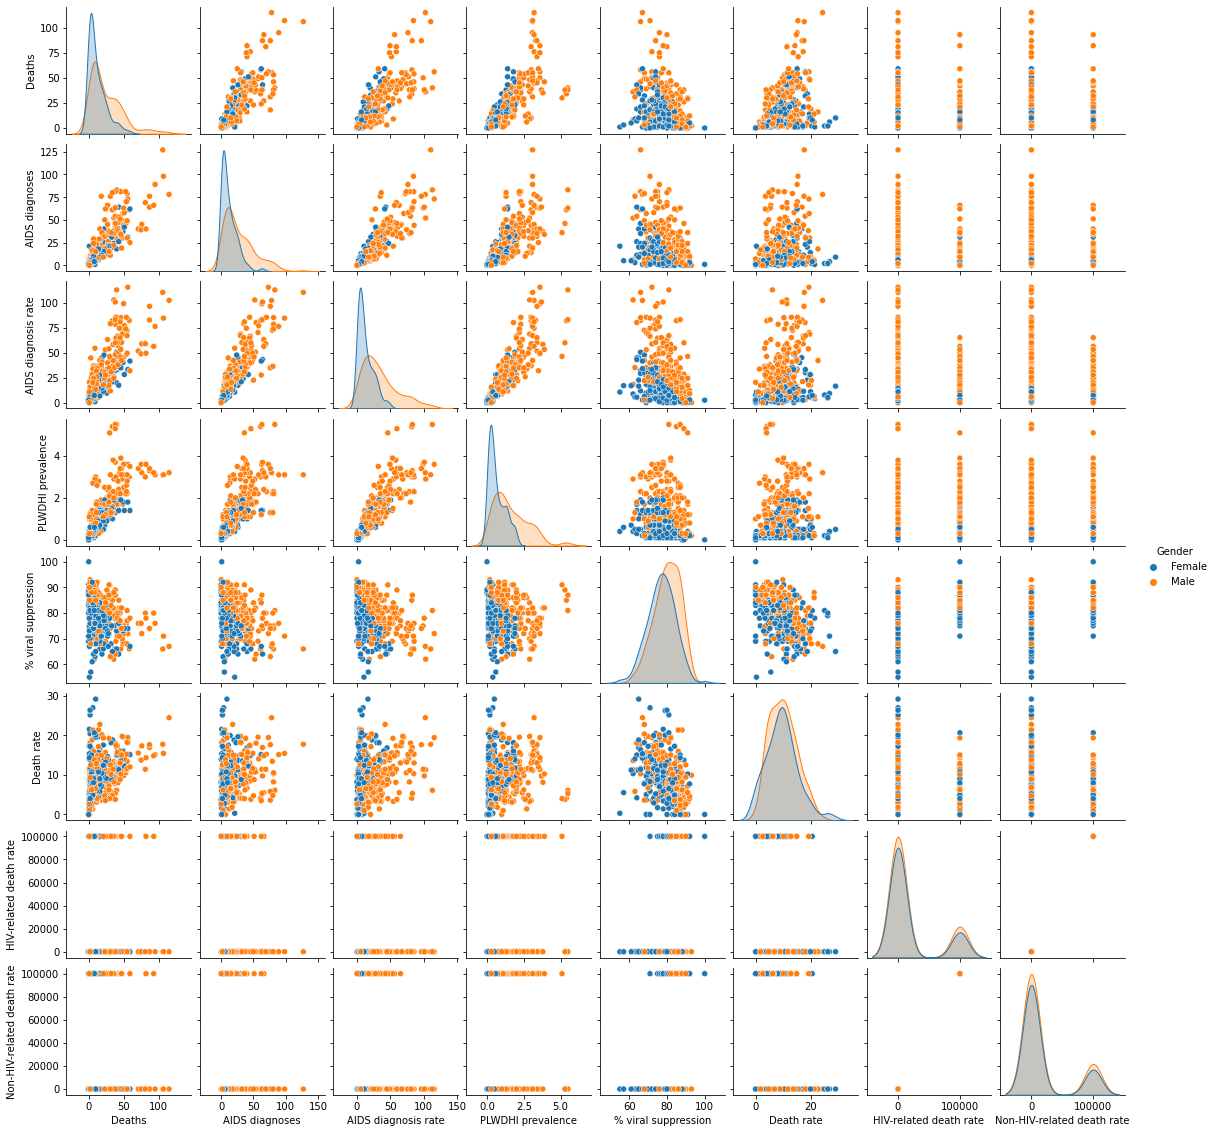

In [27]:
sns.pairplot(nova_base,height=2,hue = 'Gender');

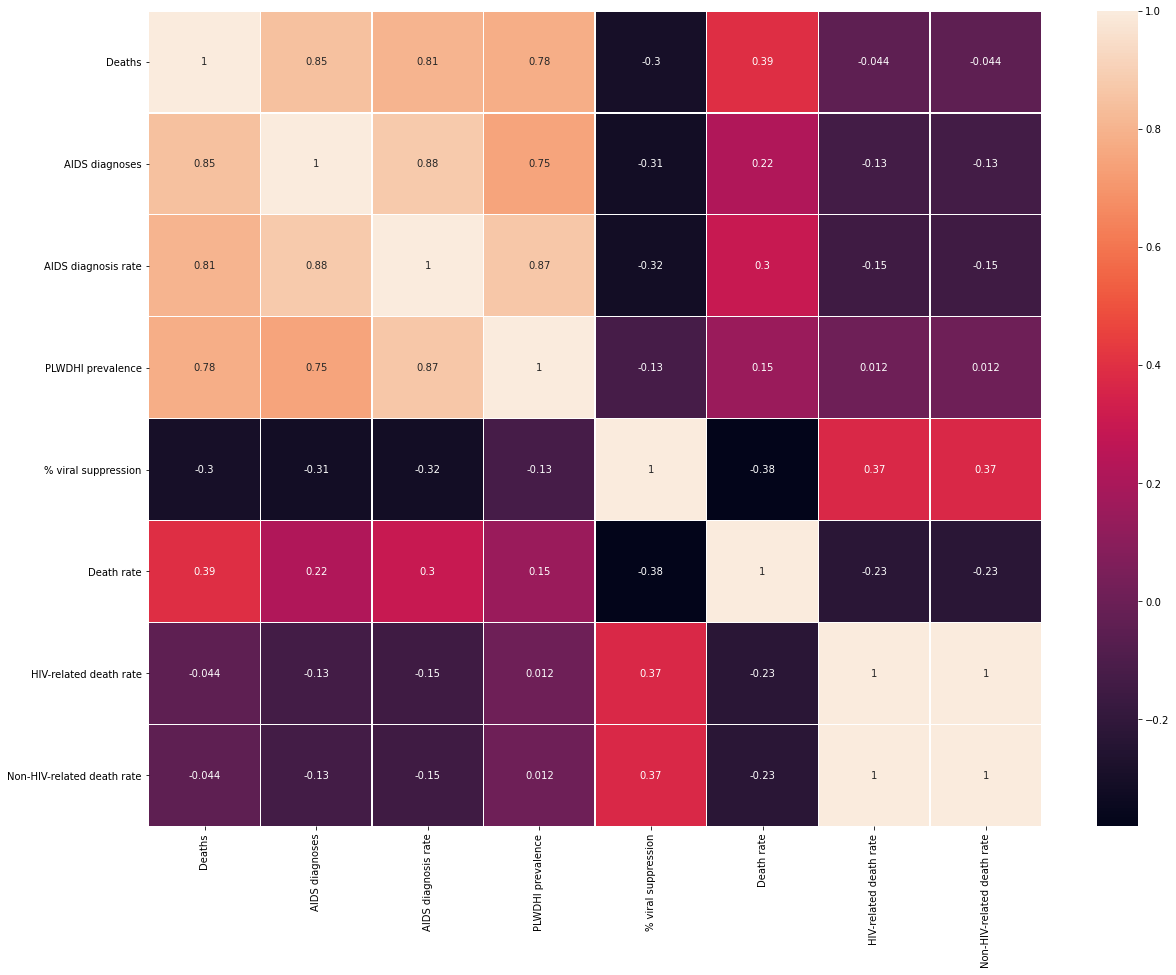

In [28]:
# Mapa de calor - Para melhor visualização de correlção entre as variáveis

fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(nova_base.corr(),ax=ax,annot=True,linewidth=.5);

### Conclusão da Análise 2.

> A segunda análise de gráficos a  target "Deaths" possui alto grau de correlação entre as features 'AIDS diagnoses', 'AIDS diagnosis rate' e 'PLWDHI prevalence'.


> Portanto, o gênero e as seis featuresa anteriormente mencionadas que possuem um alto grau de correlação serão utilizadas como base de dados para os modelos que serão apresentados posteriormente.

In [29]:
nova_base1 = base.loc[:, ['Deaths' ,'HIV diagnoses', 'HIV diagnosis rate','AIDS diagnoses', 'AIDS diagnosis rate', 'Concurrent diagnoses' , 'PLWDHI prevalence']]
nova_base2 = pd.get_dummies(nova_base['Gender'])
nova_base1['Masc/Fem'] = nova_base2['Female'].copy()

### Separando a base de dados em bases de treinamento e teste
> Utilizando a função "train_test_split" da biblioteca "sklearn", separamos a base com as features selecionadas em duas, uma para o treinamento e outra para o teste.


In [19]:
train, test = train_test_split(nova_base1, test_size = 0.25)

In [20]:
train_features = train.loc[:, ['HIV diagnoses', 'HIV diagnosis rate', 'AIDS diagnoses', 'AIDS diagnosis rate', 'Concurrent diagnoses', 'PLWDHI prevalence','Masc/Fem']]
test_features = test.loc[:, ['HIV diagnoses', 'HIV diagnosis rate', 'AIDS diagnoses', 'AIDS diagnosis rate', 'Concurrent diagnoses', 'PLWDHI prevalence','Masc/Fem']]
train_target = train['Deaths']
test_target = test['Deaths']

## Métricas de validação para modelo com target quantitativo

## R²

> "O R² é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. Ele também é conhecido como o coeficiente de determinação ou o coeficiente de determinação múltipla para a regressão múltipla."

> O R² serve apara avaliar o quão o modelo se ajusta aos dados, isto é, quanto os dados explicam a variárias preditoras (explicativas). Logo, melhor será o ajuste quão mais próximo 1 o R² estiver. Para isso foram selecionadas aleatoriamente 10 bases de dados de treinamento diferentes a fim de encontrar o R² médio.

## RMS

> "Em matemática, a raiz do valor quadrático médio ou RMS (do inglês root mean square) ou valor eficaz é uma medida estatística da magnitude de uma quantidade variável. ... O nome deriva do fato de que é a raiz quadrada da média aritmética dos quadrados dos valores. É um caso especial da potência média com o expoente p = 2."

## Método de Regressão Múltipla

> O uso do modelo de Regressão Múltipla para análise é utilizado quando necessitamos de uma análise linear entre uma variável determinante (de desfecho), nossa target "Deaths" e múltiplas variáveis explicativas (preditoras).

> A escolha da Regressão Multivariada tem como objetivo fazer previsões para valores não observados na amostra a partir de um modelo ajustado, 


https://psicometriaonline.com.br/o-que-e-regressao-linear-multipla/

> Para observar o comportamento das mortes dos indivíduos associados aos diagnósticos foi plotado o seu histograma correspondente.

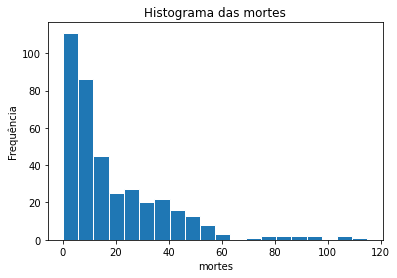

In [21]:
plt.hist(base['Deaths'], bins=20, edgecolor = 'white') #criando uma histograma

plt.title("Histograma das mortes")
plt.xlabel("mortes")
plt.ylabel("Frequência")
plt.show()

> Além disso, com base no gráfico de teste de distribuição a seguir, observa-se a semelhança a distribuição exponencial  em que os dados em azul se aproximavam da característica esperada em vermelho.

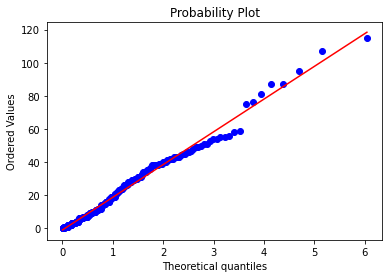

In [22]:
# Teste da distribuição Exponencial 
scipy.stats.probplot(train['Deaths'], dist='expon', plot=plt); 

 ### Validação para base de dados das mulheres

In [23]:
# Analisando a validação cruzada depois de 10 ciclos para o R²
nova_base_m = nova_base1.loc[nova_base1['Masc/Fem']==1, :]
x_dados = nova_base_m.drop(columns = ['Deaths'])
y_dados = nova_base_m['Deaths']
regress_multiple = LinearRegression()
k = KFold(n_splits = 10, shuffle=True)


media_regressao_multipla =cross_val_score(regress_multiple, x_dados, y_dados, cv=k).mean()
desvio_padrao_regressao_multipla = cross_val_score(regress_multiple, x_dados, y_dados, cv=k).std()
media_regressao_multipla,desvio_padrao_regressao_multipla

print(f'Para o modelo de Regressão Múltipla a média de R² encontrada para mulheres é {media_regressao_multipla:.4f}\ne o seu respectivo desvio padrão é {desvio_padrao_regressao_multipla:.4f}')

Para o modelo de Regressão Múltipla a média de R² encontrada para mulheres é 0.8342
e o seu respectivo desvio padrão é 0.0875


In [24]:
# Analisando a validação cruzada depois de 10 ciclos para o RMS

def display_scores1(scores):
    print(f"Para o modelo de Regressão Múltipla a média do RMS encontrada para as mulheres é: {scores.mean():.4f}")
    print(f"e o seu respectivo desvio padrão é: {scores.std():.4f}")
    
    
# Para o modelo de Regressão Múltipla

lin_reg_scores = cross_val_score(regress_multiple, x_dados, y_dados,scoring="neg_mean_squared_error", cv=k)
display_scores1(-lin_reg_scores)
rmse_scores = np.sqrt(-lin_reg_scores)

Para o modelo de Regressão Múltipla a média do RMS encontrada para as mulheres é: 23.3510
e o seu respectivo desvio padrão é: 10.4044


### Validação para base de dados dos homens

In [25]:
# Analisando a validação cruzada depois de 10 ciclos para o R²
nova_base_h = nova_base1.loc[nova_base1['Masc/Fem']==0, :]
x_dados = nova_base_h.drop(columns = ['Deaths'])
y_dados = nova_base_h['Deaths']
regress_multiple = LinearRegression()
k = KFold(n_splits = 10, shuffle=True)



media_regressao_multipla =cross_val_score(regress_multiple, x_dados, y_dados, cv=k).mean()
desvio_padrao_regressao_multipla = cross_val_score(regress_multiple, x_dados, y_dados, cv=k).std()
media_regressao_multipla,desvio_padrao_regressao_multipla



print(f'Para o modelo de Regressão Múltipla a média de R² encontrada para homens é {media_regressao_multipla:.4f}\ne o seu respectivo desvio padrão é {desvio_padrao_regressao_multipla:.4f}')

Para o modelo de Regressão Múltipla a média de R² encontrada para homens é 0.6815
e o seu respectivo desvio padrão é 0.3117


In [26]:
# Analisando a validação cruzada depois de 10 ciclos para o RMS

def display_scores1(scores):
    print(f"Para o modelo de Regressão Múltipla a média do RMS encontrada é: {scores.mean():.4f}")
    print(f"e o seu respectivo desvio padrão é: {scores.std():.4f}")
    
    
# Para o modelo de Regressão Múltipla

lin_reg_scores = cross_val_score(regress_multiple, x_dados, y_dados,scoring="neg_mean_squared_error", cv=k)
display_scores1(-lin_reg_scores)
rmse_scores = np.sqrt(-lin_reg_scores)

Para o modelo de Regressão Múltipla a média do RMS encontrada é: 139.8685
e o seu respectivo desvio padrão é: 59.9562


 > Para a análise dos dados utilizando o modelo de Regressão Multivariada, vale ressaltar que a featura "Gender" por mais que ela possa ter critério para ser descartada em nossa base ela sempre será mantida, visto que essa será nossa variável de controle e que definirá os perfil dos indivíduos. 

In [27]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [28]:
x_dados_train = train_features
y_dados_train = train_target
x_dados_test = test_features
y_dados_test = test_target
results = regress(y_dados_train,x_dados_train )
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     159.2
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           3.11e-94
Time:                        03:50:40   Log-Likelihood:                -1044.1
No. Observations:                 291   AIC:                             2104.
Df Residuals:                     283   BIC:                             2134.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1949      1.278      0.152      0.879      -2.321       2.711
HIV diagnoses           -0.3446      0.124     -2.768      0.006      -0.590      -0.100
HIV diagnosis rate      -0.0714      0.099     -0.719      0.472      -0.267       0.124
AIDS diagnoses           1.1187      0.196      5.694      0.000       0.732       1.505
AIDS diagnosis rate     -0.2221      0.156     -1.424      0.156      -0.529       0.085
Concurrent diagnoses     0.0234      0.228      0.103      0.918      -0.425       0.472
PLWDHI prevalence       13.2874      1.357      9.794      0.000      10.617      15.958
Masc/Fem                -0.8108      1.344     -0.603      0.547      -3.456       1.834
==============================================================================
Omnibus:                       34.494   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.905
Skew:                           0.310   Prob(JB):                     1.40e-34
Kurtosis:                       6.532   Cond. No.                         278.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# X_dados = sm.add_constant(x_dados_train)
X_dados_test = sm.add_constant(test_features)
y_predito_test = results.predict(X_dados_test)


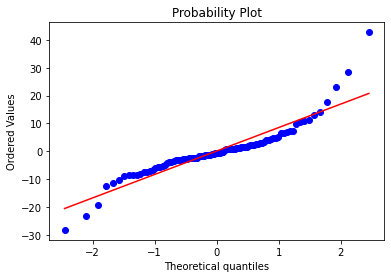

In [30]:
# Gráfico dos resíduos
residuos_test = y_dados_test - y_predito_test
plt.figure(figsize=(6,4))
stats.probplot(residuos_test,plot = plt);

> Para os resultados apresentados será descartado dos dados os P > |t| maiores que 10%. Portanto, a partir da tabela anterior será eliminado a categoria "AIDS diagnosis rate".

In [31]:
train1 = train[['Masc/Fem',
 'HIV diagnoses',
 'AIDS diagnoses',
 'AIDS diagnosis rate',
 'Concurrent diagnoses',
 'PLWDHI prevalence']]
results1 = regress(y_dados_train,train1)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     185.9
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.83e-95
Time:                        03:50:41   Log-Likelihood:                -1044.4
No. Observations:                 291   AIC:                             2103.
Df Residuals:                     284   BIC:                             2128.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0968      1.270      0.076      0.939      -2.403       2.597
Masc/Fem                -0.6815      1.330     -0.512      0.609      -3.300       1.937
HIV diagnoses           -0.4227      0.061     -6.938      0.000      -0.543      -0.303
AIDS diagnoses           1.2361      0.109     11.292      0.000       1.021       1.452
AIDS diagnosis rate     -0.3204      0.075     -4.269      0.000      -0.468      -0.173
Concurrent diagnoses     0.0447      0.226      0.198      0.843      -0.400       0.489
PLWDHI prevalence       13.0032      1.297     10.027      0.000      10.451      15.556
==============================================================================
Omnibus:                       34.032   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.444
Skew:                           0.290   Prob(JB):                     1.07e-34
Kurtosis:                       6.545   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> Agora, a partir da nova tabela será eliminado a categoria "Concurrent diagnoses".

In [32]:
train2 = train[['Masc/Fem',
 'HIV diagnoses',
 'AIDS diagnoses',
 'AIDS diagnosis rate',
 'PLWDHI prevalence']]
results2 = regress(y_dados_train,train2)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     223.9
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.83e-96
Time:                        03:50:41   Log-Likelihood:                -1044.4
No. Observations:                 291   AIC:                             2101.
Df Residuals:                     285   BIC:                             2123.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1236      1.261      0.098      0.922      -2.358       2.605
Masc/Fem               -0.7009      1.325     -0.529      0.597      -3.308       1.906
HIV diagnoses          -0.4172      0.054     -7.703      0.000      -0.524      -0.311
AIDS diagnoses          1.2432      0.103     12.057      0.000       1.040       1.446
AIDS diagnosis rate    -0.3193      0.075     -4.273      0.000      -0.466      -0.172
PLWDHI prevalence      12.9324      1.244     10.394      0.000      10.483      15.381
==============================================================================
Omnibus:                       34.175   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.939
Skew:                           0.287   Prob(JB):                     3.07e-35
Kurtosis:                       6.575   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

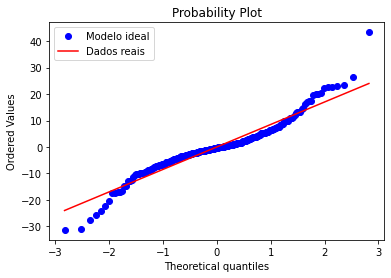

In [33]:
plt.figure(figsize=(6,4))
stats.probplot(results2.resid,plot = plt)
plt.legend(('Modelo ideal','Dados reais'))
plt.show()

In [34]:
# suposição do modelo
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson (results2.resid)

2.0524969302596934

## Método da Árvore de decisão

### Árvore de regressão


> É utilizado para tomar decisões baseados em diferentes instâncias. A classificações envolve ramificações que depende de decisões tomadas a cada instância, cujas respostas são de sim ou de não. O nó da raiz faz a divisão de um conjunto de dados e cria ramificações, isto é, diferentes caminhos baseados em decisões lógicas feitas nesse processo é em sub-árvores, que são criadas até se atingir as últimas instâncias das árvores de decisão. Ao final desse modelo vamos conseguir responder como os diagnósticos de HIV e AIDS são influenciados perante a diferença de gêneros, isto é, o diagnóstico entre homens e mulheres e se esse resulta na morte ou não do indivíduo.

* https://www.cin.ufpe.br/~pacm/SI/ArvoreDecisaoIndutiva.pdf

* https://www.inf.ufpr.br/menotti/ci171-182/slides/ci171-arvoresdecisao.pdf

In [35]:
regr = DecisionTreeRegressor()
regr.fit(x_dados_train, y_dados_train)

# Predict
y_1 = regr.predict(x_dados_test)

## Processo básico da árvore de decisão

### Feature mais relevante

> Primeiramente é preciso selecionar a featura mais importante, esse será usado como raiz (início) da árvore de decisão. Para isso, a partir da função feature_importances_, é possível identificar os atributos mais relevante para o modelo, trazendo um resultado mais eficaz para o modelo.

> Assim como para o modelo anterior a  featura "Gender" será mantida durante todo o processo de seleção das features mais relevantes, visto que essa será também nossa variável de controle para o modelo de Árvore de decisão de Regressão.


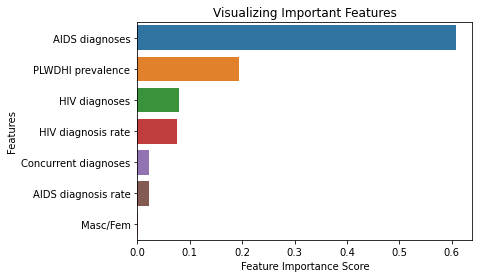

In [36]:
imp = pd.Series(regr.feature_importances_, index=x_dados_train.columns).sort_values(ascending=False)

sns.barplot(x=imp, y=imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

> A partir do gráfico anterior será feito o descarte da variável menos relevante, isto é a feature "Concurrent diagnoeses", lembrando que que Masc/Fem serão mantidas por se tratarem da categoria "Gender" anteriormente mencionada.

> A retirada das features menos importantes será então repetido até que se reste as duas principais features. 

In [37]:
features = x_dados_train[['HIV diagnoses', 'HIV diagnosis rate', 'AIDS diagnoses',
'AIDS diagnosis rate', 'PLWDHI prevalence',
'Masc/Fem']]
teste = x_dados_test[['HIV diagnoses', 'HIV diagnosis rate', 'AIDS diagnoses',
'AIDS diagnosis rate', 'PLWDHI prevalence',
'Masc/Fem']]

In [38]:
regr = DecisionTreeRegressor()
regr.fit(features, y_dados_train)

# Predict
y_1 = regr.predict(teste)

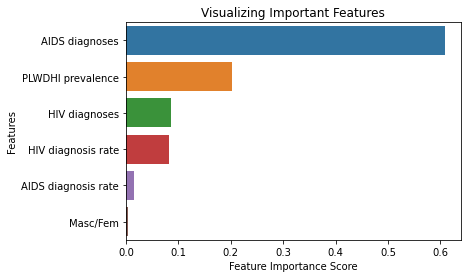

In [39]:
imp = pd.Series(regr.feature_importances_, index=features.columns).sort_values(ascending=False)

sns.barplot(x=imp, y=imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

> A feature AIDS diagnosis rate será descartada

In [40]:
features = x_dados_train[['HIV diagnoses', 'HIV diagnosis rate', 'AIDS diagnoses', 'PLWDHI prevalence',
'Masc/Fem']]
teste = x_dados_test[['HIV diagnoses', 'HIV diagnosis rate', 'AIDS diagnoses', 'PLWDHI prevalence',
'Masc/Fem']]

In [41]:
regr = DecisionTreeRegressor()
regr.fit(features, y_dados_train)

# Predict
y_1 = regr.predict(teste)

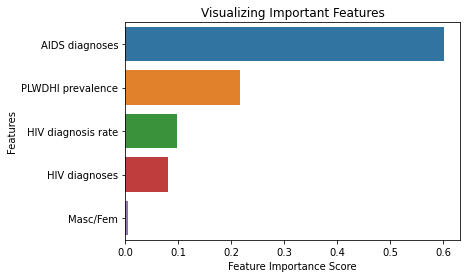

In [42]:
imp = pd.Series(regr.feature_importances_, index=features.columns).sort_values(ascending=False)

sns.barplot(x=imp, y=imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

> A feature HIV diagnoses será descartada

In [43]:
features = x_dados_train[[ 'HIV diagnosis rate', 'AIDS diagnoses', 'PLWDHI prevalence',
'Masc/Fem']]
teste = x_dados_test[[ 'HIV diagnosis rate', 'AIDS diagnoses', 'PLWDHI prevalence',
'Masc/Fem']]

In [44]:
regr = DecisionTreeRegressor()
regr.fit(features, y_dados_train)

# Predict
y_1 = regr.predict(teste)

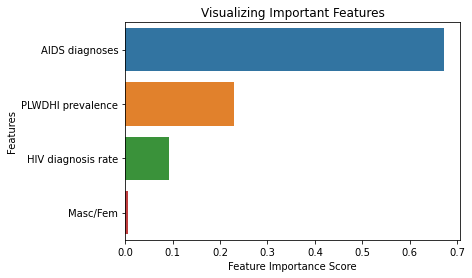

In [45]:
imp = pd.Series(regr.feature_importances_, index=features.columns).sort_values(ascending=False)

sns.barplot(x=imp, y=imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

> A feature HIV diagnosis rate será descartada

In [46]:
features = x_dados_train[[ 'AIDS diagnoses', 'PLWDHI prevalence',
'Masc/Fem']]
teste = x_dados_test[[ 'AIDS diagnoses', 'PLWDHI prevalence',
'Masc/Fem']]

In [47]:
regr = DecisionTreeRegressor()
regr.fit(features, y_dados_train)

# Predict
y_1 = regr.predict(teste)

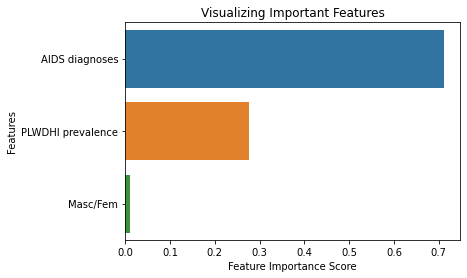

In [48]:
imp = pd.Series(regr.feature_importances_, index=features.columns).sort_values(ascending=False)

sns.barplot(x=imp, y=imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Definindo as targets e features masculino e feminino

In [49]:
target_m = {'Deaths': y_dados_train, 'Masc/Fem': x_dados_train['Masc/Fem']}
target_m = pd.DataFrame(data=target_m)

In [50]:
target_h = {'Deaths': y_dados_train, 'Masc/Fem': x_dados_train['Masc/Fem']}
target_h = pd.DataFrame(data=target_h)

In [51]:
target_m = target_m.loc[target_m["Masc/Fem"] == 1, ['Deaths']]
target_h = target_h.loc[target_h["Masc/Fem"] == 0, ['Deaths']]

In [52]:
target_test_m = {'Deaths': y_dados_test, 'Masc/Fem': x_dados_test['Masc/Fem']}
target_test_m = pd.DataFrame(data=target_test_m)

In [53]:
target_test_h = {'Deaths': y_dados_test, 'Masc/Fem': x_dados_test['Masc/Fem']}
target_test_h = pd.DataFrame(data=target_test_h)

In [54]:
target_test_m = target_test_m.loc[ target_test_m["Masc/Fem"] == 1, ["Deaths"]]
target_test_h = target_test_h.loc[ target_test_h["Masc/Fem"] == 0, ["Deaths"]]

In [55]:
features_m = x_dados_train.loc[ x_dados_train["Masc/Fem"] == 1, ['AIDS diagnoses', 'PLWDHI prevalence', 'HIV diagnoses']]
features_h = x_dados_train.loc[ x_dados_train["Masc/Fem"] == 0, ['AIDS diagnoses', 'PLWDHI prevalence', 'HIV diagnoses']]

In [56]:
teste_m = x_dados_train.loc[ x_dados_train["Masc/Fem"] == 1, ['AIDS diagnoses', 'PLWDHI prevalence', 'HIV diagnoses']]
teste_h = x_dados_test.loc[ x_dados_test["Masc/Fem"] == 0, ['AIDS diagnoses', 'PLWDHI prevalence', 'HIV diagnoses']]

In [57]:
regr_m = DecisionTreeRegressor(max_depth=3)
regr_m.fit(features_m, target_m)

# Predict
y_m = regr.predict(teste_m)

In [58]:
regr_h = DecisionTreeRegressor(max_depth=3)
regr_h.fit(features_h, target_h)

# Predict
y_h = regr.predict(teste_h)

In [59]:
from sklearn import tree

### Árvore de regressão para mulheres

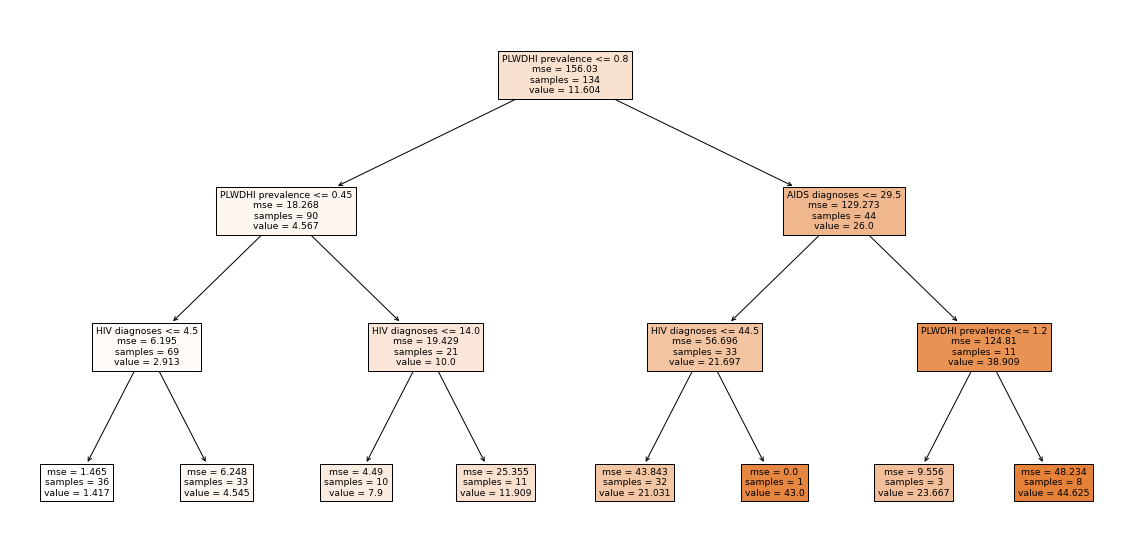

In [60]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(regr_m,
                    feature_names=features_m.columns,  
                    filled=True)

### Árvore de regressão para homens

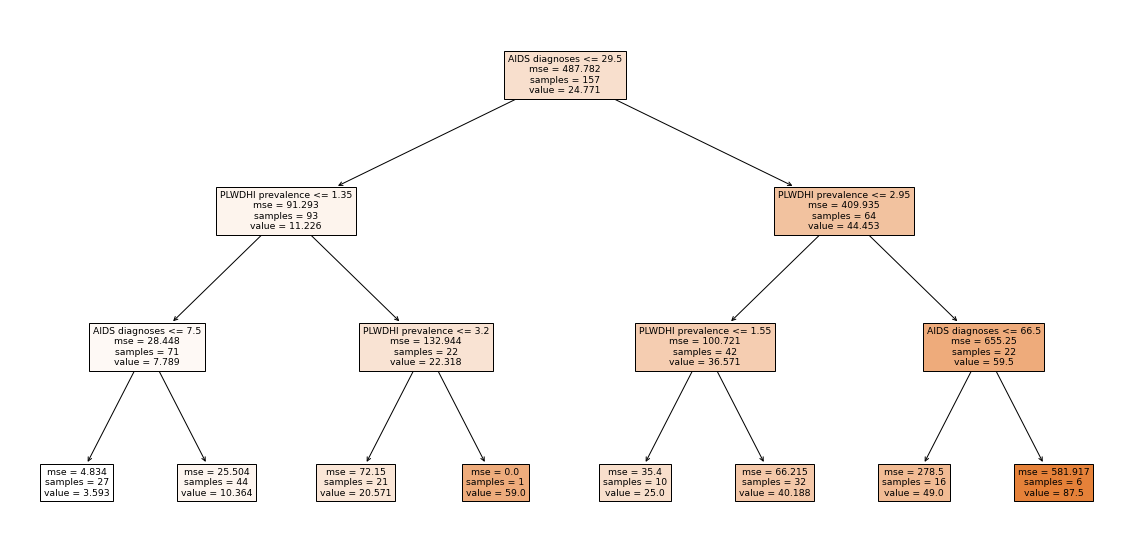

In [61]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(regr_h,
                    feature_names=features_h.columns,  
                    filled=True)

## Cálculo do R² e RMS para o modelo de Árvore de decisão de regressão

### Para mulheres

In [62]:
# Analisando a validação cruzada depois de 10 ciclos para o R² para as mulheres
x_dados = nova_base_m.drop(columns = ['Deaths'])
y_dados = nova_base_m['Deaths']
k = KFold(n_splits=10, shuffle=True)



media = cross_val_score(regr, x_dados, y_dados, scoring = 'r2',cv=k).mean()
desvio = cross_val_score(regr, x_dados, y_dados, cv=k).std()
media, desvio



print(f'Para o modelo de Árvore de decisão de Regressão a média do R² encontrada para mulheres é {media:.4f}\ne o seu respectivo desvio padrão é {desvio:.4f}')

Para o modelo de Árvore de decisão de Regressão a média do R² encontrada para mulheres é 0.5955
e o seu respectivo desvio padrão é 0.1260


In [63]:
# Analisando a validação cruzada depois de 10 ciclos para o RMS para as mulheres

def display_scores2(scores):
    print(f"Para o modelo de Árvore de decisão de Regressão a média do RMS encontrada é: {scores.mean():.4f}")
    print(f"e o seu respectivo desvio padrão é: {scores.std():.4f}")
    
    
# Para o modelo de Árvore de decisão de Regressão

Decision_reg_scores = cross_val_score(regr, x_dados, y_dados,scoring = "neg_mean_squared_error", cv=k)
display_scores2(-Decision_reg_scores)
rmse_scores = np.sqrt(-Decision_reg_scores)

Para o modelo de Árvore de decisão de Regressão a média do RMS encontrada é: 56.1489
e o seu respectivo desvio padrão é: 26.3552


### Para homens

In [64]:
# Analisando a validação cruzada depois de 10 ciclos para o R² para os homens
x_dados = nova_base_h.drop(columns = ['Deaths'])
y_dados = nova_base_h['Deaths']
k = KFold(n_splits=10, shuffle=True)



media = cross_val_score(regr, x_dados, y_dados, scoring = 'r2',cv=k).mean()
desvio = cross_val_score(regr, x_dados, y_dados, cv=k).std()
media, desvio



print(f'Para o modelo de Árvore de decisão de Regressão a média do R² encontrada para homens é {media:.4f}\ne o seu respectivo desvio padrão é {desvio:.4f}')


Para o modelo de Árvore de decisão de Regressão a média do R² encontrada para homens é 0.6074
e o seu respectivo desvio padrão é 0.1411


In [65]:
# Analisando a validação cruzada depois de 10 ciclos para o RMS para os homens


def display_scores2(scores):
    print(f"Para o modelo de Árvore de decisão de Regressão a média do RMS encontrada é: {scores.mean():.4f}")
    print(f"e o seu respectivo desvio padrão é: {scores.std():.4f}")
    
    
# Para o modelo de Árvore de decisão de Regressão

Decision_reg_scores = cross_val_score(regr, x_dados, y_dados,scoring = "neg_mean_squared_error", cv=k)
display_scores2(-Decision_reg_scores)
rmse_scores = np.sqrt(-Decision_reg_scores)

Para o modelo de Árvore de decisão de Regressão a média do RMS encontrada é: 151.8786
e o seu respectivo desvio padrão é: 78.0241


# Conclusão

## Comparação dos modelos de Regressão Múltipla e de Árvore de decisão de Regressão

### Comparação do melhor ajuste dos modelos a partir dos resultados de R²



### Para as mulheres:




* Para o modelo de Regressão Múltipla a média de R² encontrada para mulheres é 0.8453 e o seu respectivo desvio padrão é 0.0539

* Para o modelo de Árvore de decisão de Regressão a média do R² encontrada para mulheres é 0.6245 e o seu respectivo desvio padrão é 0.2049


> Para o número de mortes primeiramente levando em consideração a difrentes gêneros (masculino e feminino) foi usado o modelo de regressão Múltipla, aceditando ter melhor performance do modelo também foi utilizado o modelo de Árvore de Decisão de Regressão.



>A partir dos resultados de R² encontrados para as as mulheres do primeiro modelo em comparação com o segundo se mostrou melhor perante o cálculo de R² que se apresentou mais de 1.



#### Melhor performace para as mulheres - Regressão Múltipla



### Para os homens:


* Para o modelo de Regressão Múltipla a média de R² encontrada para homens é 0.7134 e o seu respectivo desvio padrão é 0.1632

* Para o modelo de Árvore de decisão de Regressão a média do R² encontrada para homens é 0.5189 e o seu respectivo desvio padrão é 0.1203


>Já para os resultados de R² encontrados para os homens o primeiro modelo em comparação com o segundo se mostrou melhor perante o cálculo de R² que se encontra mais próximo de 1.



#### Melhor performance para os homens - Regressão Múltipla

### Comparação do melhor ajuste dos modelos a partir dos resultados do RMS



### Para as mulheres:




* Para o modelo de Regressão Múltipla a média do RMS encontrada para as mulheres é em torno de 22.3848 e o seu respectivo desvio padrão é: 10.8545


* Para o modelo de Árvore de decisão de Regressão a média do RMS encontrada é em torno de 34.8745 e o seu respectivo desvio padrão é: 16.7979



> A partir dos resultados de encontrados do RMS para as as mulheres do primeiro modelo em comparação com o segundo modelo se mostrou melhor perante o cálculo de RMS, visto que esse possui um valor de RMS maior.



#### Melhor performace para as mulheres - Regressão Múltipla



### Para os homens:

* Para o modelo de Regressão Múltipla a média do RMS encontrada é: 147.2428 é em torno de o seu respectivo desvio padrão é: 81.1740

* Para o modelo de Árvore de decisão de Regressão a média do RMS encontrada é em torno de 163.1431 e o seu respectivo desvio padrão é: 134.2340


> Já para os resultados encontrados para os homens o primeiro modelo em comparação com o segundo modelo também se mostrou melhor perante o cálculo de RMS, visto que esse possui um menor valor de RMS.


#### Melhor performance para os homens -  Regressão Múltipla


>> O modelo de Regressão Múltipla se mostrou satisfatório perante a análise tanto para as mulheres quanto para homens sendo mais adequado tanto analisando o ajuste do modelo pelo cálculo do R² quanto para o do RMS.

> Conclui-se que o  melhor modelo para prever a morte de pessoas com HIV e AIDS diante da distinção de gênero é o de Regressão Múltipla, possuindo valores bastante satisfatórios de R² e RMS para ambos os sexos.


## Referências Bibliográficas 

* https://www.kaggle.com/mostafafaramin/hivaids-annual-report
* https://data.cityofnewyork.us/Health/DOHMH-HIV-AIDS-Annual-Report/fju2-rdad
* https://scikit-learn.org/stable/index.html
* https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o
* https://www.ti-enxame.com/pt/python/existe-uma-funcao-de-biblioteca-para-root-mean-square-error-rmse-em-python/1072896184/
* https://www.ti-enxame.com/pt/python/existe-uma-funcao-de-biblioteca-para-root-mean-square-error-rmse-em-python/1072896184/
* https://help.salesforce.com/s/articleView?id=sf.bi_edd_model_metrics_cross_validation_measure.htm&type=5
* https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-est%C3%A1-funcionando-mesmo-a5892f6468b
* https://nathaliatito.medium.com/scikit-learn-ou-statsmodels-avaliando-meu-modelo-de-regress%C3%A3o-f4c04b361fa7
* https://www.grupoghanem.com.br/diferenca-entre-hiv-e-aids/